I start by importing all the necessary modules to work with the dataset and present the diagrams

In [1]:
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I load the dataset directly from the site. selecting only the columns of interest

In [2]:
page = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
df1 = pd.read_csv(page, index_col=False, header=None, names=['Poisonous?', 'Cap Color', 'Odor'], usecols=[0,3,5])

I change the values to numeric for downstream processing. produce value counts to validate my diagram. diagram shows distribution of edible/poisonous. Pretty equal distribution.

0    4208
1    3916
Name: Poisonous?, dtype: int64


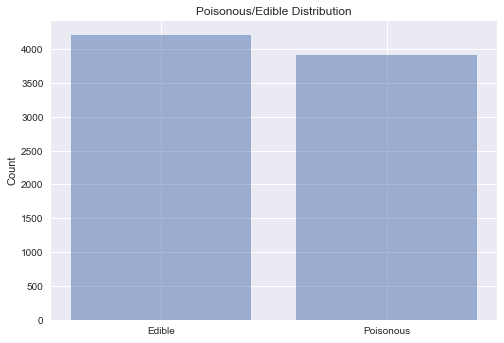

In [3]:
# poisonous = 1, edible = 0
df1.replace(to_replace={'Poisonous?':{'p':1, 'e': 0}}, inplace=True)

countsp = df1['Poisonous?'].value_counts()
print countsp

#Poisonous/Edible Distribution
objects1 = ['Edible', 'Poisonous']
y_pos = np.arange(len(objects1))
data = countsp
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects1)
plt.ylabel('Count')
plt.title('Poisonous/Edible Distribution')
plt.show()

I change the values to numeric for downstream processing. produce value counts to validate my diagram. diagram shows distribution of Cap Color

0    2284
3    1840
7    1500
9    1072
8    1040
1     168
5     144
2      44
6      16
4      16
Name: Cap Color, dtype: int64


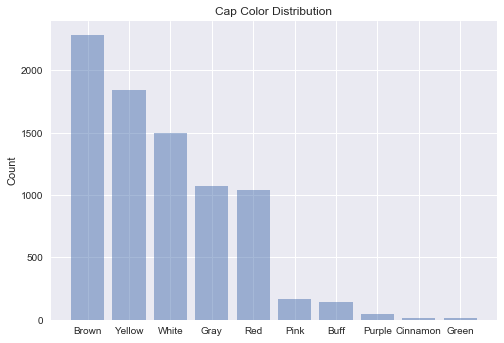

In [4]:
#3. cap-color:                brown=n=0,buff=b=1,cinnamon=c=2,gray=g=3,green=r=4,
#                             pink=p=5,purple=u=6,red=e=7,white=w=8,yellow=y=9
df1.replace(to_replace={'Cap Color':{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)

countsc = df1['Cap Color'].value_counts()
print countsc

#Cap Color Distribution
objects2 = ['Brown', 'Yellow', 'White', 'Gray', 'Red', 'Pink', 'Buff', 'Purple', 'Cinnamon', 'Green']
y_pos = np.arange(len(objects2))
data = countsc
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects2)
plt.ylabel('Count')
plt.title('Cap Color Distribution')
plt.show()

I change the values to numeric for downstream processing. produce value counts to validate my diagram. diagram shows distribution of Odor

6    3528
4    2160
3     576
8     576
1     400
0     400
7     256
2     192
5      36
Name: Odor, dtype: int64


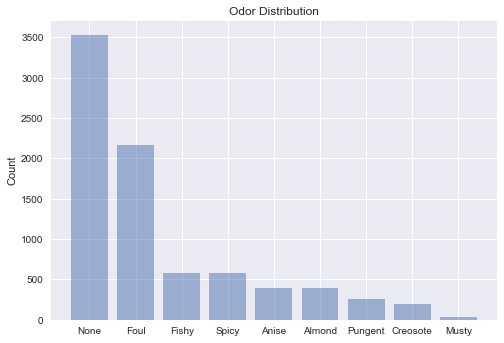

In [5]:
# 5. odor:                     almond=a=0,anise=l=1,creosote=c=2,fishy=y=3,foul=f=4,
#                              musty=m=5,none=n=6,pungent=p=7,spicy=s=8
df1.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)

countso = df1['Odor'].value_counts()
print countso

#Odor Distribution
objects3 = ['None', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent', 'Creosote', 'Musty']
y_pos = np.arange(len(objects3))
data = countso
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects3)
plt.ylabel('Count')
plt.title('Odor Distribution')
plt.show()

For the digram below I plot Cap Color and Odor, with the color reflecting if the mushroom is edible or poisonous.

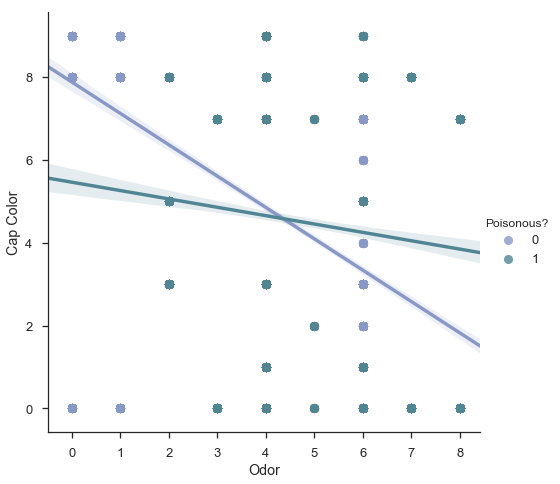

In [6]:
# Scatter Plot
sns.set(style="ticks", context="talk")
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='Odor', y='Cap Color', hue='Poisonous?', data=df1, palette=pal, size=7)
g.set_axis_labels("Odor", "Cap Color")
sns.plt.show()

In my interpretation of the diagram above I see that Cap Color is a good, but not absolute, indicator if the mushroom will be poisonous. I would definitely steer clear of mushrooms with a brown/0 colored cap. Additionally, if the mushroom has a foul/4 smell, regardless of color, it could be poisonous.